In [1]:
import os

In [2]:
os.chdir(os.path.join('..','..','..','..','..','..','..','..','..'))
os.getcwd()

'C:\\'

In [3]:
import tweepy
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key, consumer_secret, access_token, access_token_secret
import time
import datetime as dt
import matplotlib.pyplot as plt


In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
medialist = ['BBCNews', 'CBSNews', 'CNN', 'Fox', 'nytimes']

In [6]:
# Tweepy API Setup
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
responselist = []
def twittercall(user_account, num_tweets, entrylist):
    
    #This sets up the cursor and appends all responses to the tweets list
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(num_tweets):
        tweets.append(tweet)
    
    #This creates the lists to collect the responses
    tweetcounter = 1
    for t in tweets:
        responsedict = {'Source': user_account,
                        'Tweet Text': t.full_text,
                        'Tweet ID': t.id,
                        'Tweet Time': t.created_at,
                        'Tweet Number': tweetcounter,
                        'Favorite Count': t.favorite_count
                       }
        tweetcounter += 1
        entrylist.append(responsedict)

In [8]:
#This calls each twitter handle and appends the color
for handles in medialist:
    twittercall(handles, 100, responselist)
    time.sleep(3)

In [9]:
#This creates the dataframe that will be the basis for all analysis
socialDF = pd.DataFrame(responselist)
# socialDF.to_csv('socialmediaresults.csv')

In [10]:
#Sentiment Scores
for index, row in socialDF.iterrows():
    socialDF.loc[index, 'Compound'] = analyzer.polarity_scores(row['Tweet Text'])["compound"]
    socialDF.loc[index, 'Positive'] = analyzer.polarity_scores(row['Tweet Text'])["pos"]
    socialDF.loc[index, 'Neutral'] = analyzer.polarity_scores(row['Tweet Text'])["neu"]
    socialDF.loc[index, 'Negative'] = analyzer.polarity_scores(row['Tweet Text'])["neg"]

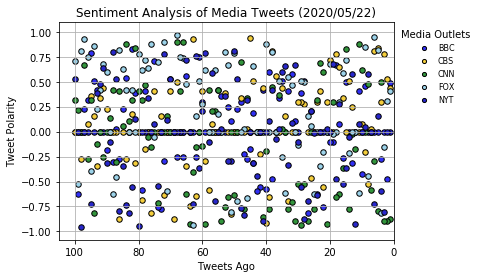

In [11]:
ax = socialDF[socialDF["Source"] == 'BBCNews'].plot.scatter(x="Tweet Number", y="Compound", s=30, edgecolors='black', c='#302ff5', label='BBC')
socialDF[socialDF["Source"] == 'CBSNews'].plot.scatter(x="Tweet Number", y="Compound", s=30, edgecolors='black', c='#f4ce3b', label='CBSNews', ax=ax)
socialDF[socialDF["Source"] == 'CNN'].plot.scatter(x="Tweet Number", y="Compound", s=30, edgecolors='black', c='#32953c', label='CNN', ax=ax)
socialDF[socialDF["Source"] == 'Fox'].plot.scatter(x="Tweet Number", y="Compound", s=30, edgecolors='black', c='#9cd3ea', label='Fox', ax=ax)
socialDF[socialDF["Source"] == 'nytimes'].plot.scatter(x="Tweet Number", y="Compound", s=30, edgecolors='black', c='#2827cb', label='nytimes', ax=ax)

plt.grid()
plt.xlabel("Tweets Ago")
plt.xlim(105,0)
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({dt.datetime.now().strftime('%Y/%m/%d')})")
plt.legend(('BBC', 'CBS', 'CNN', 'FOX', 'NYT'),scatterpoints=1,loc='upper right',bbox_to_anchor=(1.25, 1),ncol=1,\
           fontsize=8, markerscale=0.75,title='Media Outlets',edgecolor='none',framealpha=1.00)

plt.show()
# plt.savefig("tweetSentiment.png")

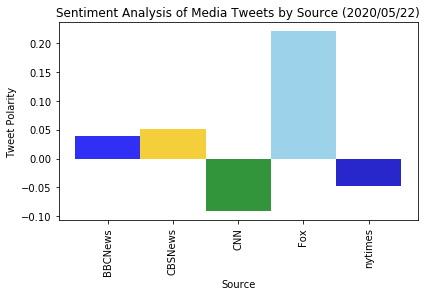

In [12]:
averageDF = socialDF.groupby(['Source'])
averageDF = averageDF['Compound'].mean()
averageDF.plot.bar(width=1, color=['#302ff5', '#f4ce3b', '#32953c', '#9cd3ea', '#2827cb'])
plt.ylabel("Tweet Polarity")
plt.tight_layout()
plt.title(f"Overall Media Sentiment based on Twitter ({dt.datetime.now().strftime('%Y/%m/%d')})")
plt.show()
# plt.savefig("sourceSentiment.png")

Observable Trends:

1. Most social media outlets are only tweeting generic links, which are evaluated as neutral.
2. While practically this doesn't seem correct, Fox doesn't seem to often have a negative overall sentiment.
2. Conversely, CNN often does have an negative overall sentiment.

For follow up, it would be interesting to see if the trends related to Fox and CNN flip based on the party affiliation of the president.
